#### What is the K-Nearest Neighbors (KNN) Algorithm?
The K-Nearest Neighbors (KNN) algorithm is a simple, non-parametric, and instance-based algorithm used for both classification and regression tasks. For classification, KNN assigns a class to a sample based on the majority class among its nearest 
𝐾 neighbors. For regression, it takes the average or weighted average of the target values of its neighbors. It relies on calculating the distance (often Euclidean) between data points to identify which points are "neighbors" to each other.

#### Generate and Plot Random Data for KNN
To demonstrate KNN, we can generate a dataset with two classes (e.g., two different clusters of points) that are close enough for the KNN to classify.

- Generate synthetic data points for each class.
- Plot the points on a scatter plot to visually see how KNN would classify a new point based on its neighborhood.

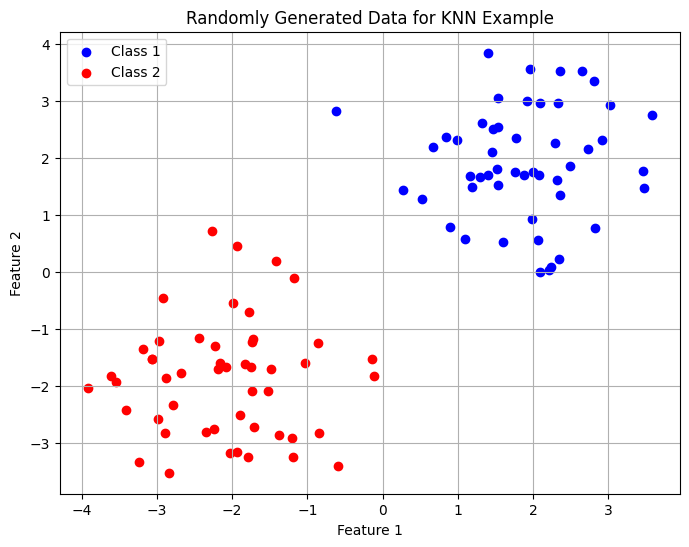

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for two classes
np.random.seed(42)
class_1 = np.random.randn(50, 2) + np.array([2, 2])
class_2 = np.random.randn(50, 2) + np.array([-2, -2])

# Combine the data
X = np.vstack((class_1, class_2))
y = np.hstack((np.zeros(50), np.ones(50)))  # 0 for class 1, 1 for class 2

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="red", label="Class 2")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("Randomly Generated Data for KNN Example")
plt.grid(True)
plt.show()


#### Is KNN Good for Regression or Classification?
KNN is suitable for both regression and classification:

- Classification: KNN predicts the class by "voting" on the class that appears most frequently among the K nearest neighbors.
- Regression: KNN predicts the value as the mean (or weighted average) of the values of the K nearest neighbors.

#### Implementing KNN from Scratch Using NumPy
Here's a basic implementation of KNN using NumPy for a classification task:

In [3]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        # Calculate distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Get the indices of the k-nearest samples
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k-nearest samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Generate a sample dataset (e.g., binary classification)
np.random.seed(0)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the KNN model
k = 5  # Setting k=5
knn = KNN(k=k)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Performance Measurement

# Classification accuracy
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Print accuracy
print("Accuracy:", accuracy(y_test, y_pred))


Accuracy: 1.0


#### When to Use KNN and When Not to Use It

#### Use KNN When:

- Small Datasets: KNN can be slow for large datasets since it computes distances for all samples.
- Low Dimensionality: KNN performs best when the feature space has low dimensionality. It suffers in high-dimensional spaces (the “curse of dimensionality”).
- Balanced Data: Works best when classes have a roughly balanced number of samples.

#### Avoid KNN When:

- Large Datasets: KNN is slow for large datasets because it calculates the distance between the test sample and all training samples.
- High Dimensionality: With many features, distances lose meaning due to the curse of dimensionality.
- Noisy Data: Sensitive to noisy or irrelevant features, which can degrade its accuracy.

#### What is the Loss Function?
KNN does not use a traditional loss function since it’s instance-based and does not optimize a model's parameters. Instead, distance functions (e.g., Euclidean, Manhattan) serve as proxies for the "loss" by indicating the similarity between data points.

For regression tasks, Mean Squared Error (MSE) is often used to evaluate the performance of the model.

#### Optimizing the Algorithm
KNN has limited optimization since it’s a lazy learner. However, improvements are possible by:

- Choosing an Optimal K: Use cross-validation to find the best 𝐾.
- Feature Scaling: Normalize or standardize data, as KNN relies on distances.
- Distance Metrics: Experiment with distance metrics, e.g., Euclidean, Manhattan, or Minkowski.
- Dimensionality Reduction: Use techniques like PCA or LDA to reduce the number of features, mitigating the curse of dimensionality.

#### What Else Should I Know About KNN?
- Choice of K: The value of 𝐾 has a significant impact. A low 𝐾 may lead to overfitting, while a high 𝐾 may result in underfitting.
- Distance Metrics: Different metrics impact the model, and selecting the right one depends on your data (e.g., Manhattan for grid-like data, Euclidean for continuous).
- Memory Requirements: Since KNN stores all training data, it can be memory-intensive for large datasets.
- Lazy Learning: KNN is a lazy learner, meaning it doesn’t train a model but makes predictions by comparing each test instance to training data, making it relatively slow.

#### Distance Metrics

Here are some common distance metrics used in KNN and other algorithms, with examples of when to use each:

- Euclidean Distance

    - Formula: $$ d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

    - Usage: Best for continuous data where all features have similar scales (e.g., height and weight).
    - Avoid When: Features have different scales or there are categorical data points.

- Manhattan Distance (L1 Norm)

    - Formula: $$ d(x, y) = \sum_{i=1}^n |x_i - y_i| $$

    - Usage: Good for high-dimensional data or when moving along grid-like paths (e.g., city block distances).
    - Avoid When: Diagonal movements or continuous data without grid structure.

- Minkowski Distance

    - Formula: $$ d(x, y) = \left(\sum_{i=1}^n |x_i - y_i|^p\right)^{1/p} $$
    
    - Usage: Generalization of Euclidean (p=2) and Manhattan (p=1) distances; allows flexibility with parameter 𝑝.
    - Avoid When: 𝑝 is not chosen carefully or for non-numeric data.

- Cosine Similarity

    - Formula: $$ similarity(x, y) = \frac{x \cdot y}{||x|| ||y||} $$

    - Usage: Useful for text and document data, especially when vector magnitudes differ but directions matter.
    - Avoid When: Magnitude is important, not just direction (e.g., pixel intensities).

- Hamming Distance

    - Formula: Number of positions at which the corresponding symbols are different.
    - Usage: Categorical data (e.g., binary strings or text sequences).
    - Avoid When: Data are continuous or differences in values matter.

- Mahalanobis Distance

    - Formula: $$ d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)}$$

    ​
    , where 𝑆 is the covariance matrix.
    - Usage: When dealing with correlated features, as it accounts for feature variances.
    - Avoid When: Features are independent or if the covariance matrix is hard to compute accurately.

Choosing the right metric depends on the data type, feature correlation, and scale requirements for the problem.

KNN is a versatile, simple algorithm best suited for smaller, well-defined datasets with low dimensionality. It’s often used as a baseline for comparison due to its ease of interpretation and intuitive structure.